In [1]:
# Import the necessary libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import pandas as pd
import numpy as np
import sklearn
import random as random
random.seed(5) 

## Data Ingestion and Basic Stats
Load data and look at its shape.

In [2]:
# the only real thing to explain here is that i lower cased everything
# and for skills i removed duplicates after lower casing them so if 
# a job required "Analytics" and "analytics", we would reduce to just "analytics"
data = pd.read_csv("Dice.txt", sep = "|", names = ['JobID', 'Title','Skills'],
                  converters = {'JobID':str, 'Title':lambda x: str(x).lower(), 
                                'Skills':lambda x: list(set(x.lower().split("::")))})

In [3]:
data.head()

,JobID,Title,Skills
0,11542,system engineer,"[support, engineer, engineering, cots, agile, ..."
1,11543,application/desktop support associate,"[desktop support, support, sql server, sql, cu..."
2,11540,sap ssc consultant,"[sales, consultant, sap, requirement, net]"
3,11541,it finance and compliance analyst,"[support, procurement, analytical, lead, finan..."
4,11546,"ios developer - ios development, mobile develo...","[computer, engineer, apps, computer science, a..."


In [4]:
data.shape

(50000, 3)

In [5]:
data.describe()

,JobID,Title,Skills
count,50000,50000,50000
unique,50000,33948,48265
top,33013,project manager,"[support, training, sales, excel, wireless, na..."
freq,1,532,39


## Data Exploration

### Number of Skills required
Let's look around to see how many skills are required for jobs and what are some of the most requested skills.

In [6]:
data = data.assign(NumberSkills = lambda data: data.Skills.apply(lambda x: len(x)))

In [7]:
data.head()

,JobID,Title,Skills,NumberSkills
0,11542,system engineer,"[support, engineer, engineering, cots, agile, ...",16
1,11543,application/desktop support associate,"[desktop support, support, sql server, sql, cu...",18
2,11540,sap ssc consultant,"[sales, consultant, sap, requirement, net]",5
3,11541,it finance and compliance analyst,"[support, procurement, analytical, lead, finan...",35
4,11546,"ios developer - ios development, mobile develo...","[computer, engineer, apps, computer science, a...",20


What's the distribution of number of skills required

(array([2.903e+03, 4.238e+03, 6.604e+03, 5.221e+03, 6.631e+03, 4.517e+03,
        3.950e+03, 4.355e+03, 2.507e+03, 2.731e+03, 1.600e+03, 1.269e+03,
        1.239e+03, 6.270e+02, 5.720e+02, 3.040e+02, 2.180e+02, 1.910e+02,
        7.200e+01, 7.800e+01, 3.700e+01, 3.600e+01, 2.000e+01, 1.100e+01,
        1.000e+01, 1.100e+01, 6.000e+00, 3.000e+00, 3.000e+00, 9.000e+00,
        3.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 3.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 3.000e+00, 3.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

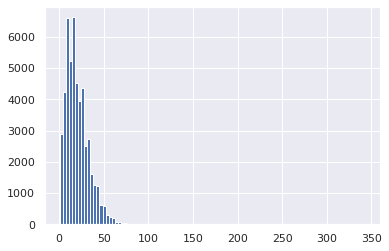

In [8]:
fig, axi = plt.subplots()
axi.hist(data['NumberSkills'], bins = 100)

In [9]:
data.NumberSkills.describe()

count    50000.000000
mean        20.491680
std         13.219016
min          1.000000
25%         11.000000
50%         18.000000
75%         28.000000
max        342.000000
Name: NumberSkills, dtype: float64

Very long tail. I'm worried that the tail jobs are just tried to do some sort of SEO or something. I want to inspect a bit more. 

Let's just look at jobs requiring > 70 skills (which seems crazy).

In [10]:
tail_data = data[data.NumberSkills > 70].copy()

In [11]:
tail_data.shape

(160, 4)

In [12]:
tail_data.sample(20, random_state = 34)

,JobID,Title,Skills,NumberSkills
34665,32499,network admin / security,"[windows os, multiplexers, vpn, lead, telephon...",261
10501,11335,java with google web tool kit,"[marketing, test scripts, purchasing, lead, hb...",257
12016,22205,systems administrator ii,"[support, unix, reliability, apache, integrati...",73
22465,37696,"sap sr. analyst, sd otc variant config vc, cor...","[lead, data modeling, bw, performance tuning, ...",91
2482,10592,sap basis,"[marketing, test scripts, siemens, purchasing,...",155
28009,42279,java developer,"[computer, support, test cases, unix, reliabil...",74
28318,31343,.net lead developer with 508 compliance,"[computer, support, engineer, analytical, prog...",75
12799,18932,multiple sr .net openings @@ md (f2f req...,"[software development, documentation, javascri...",87
19118,16906,active directory specialist,"[vpn, lead, documentation, it security, net, s...",93
25710,18951,hedge fund senior networking engineer,"[dos, vpn, telephony, documentation, rsa, ccnp...",82


Upon examining this there are three things I want to examine: 

1) Long lists of skill requirements? Are they coherent and do they match the titles? Or should I eliminate them as spam? 

2) Non-specific titles? Titles like "new multiple hot positions" are non-specific and my first thought would be that they are just looking for clicks or warm bodies or something.

3) Long titles? It could be that titles are being padded just as are skill requirements

I will look at 1) below

I will look at 2) briefly below. 

For 1) I will just see how many "new multiple hot positions" roles there are. It seems like this could be a significant problem as we see 2 examples of this 

### Non-specific Roles
My concern is that there a lot of wildly generic roles that are just trying to get people "in the door" and are malicious postings. I'd want to separate these postings from the legit so I could study malicious behavior separate from legitimate behavior.

However I probably don't have enough time to really look at this, so I'm just going to start by seeing how big of a problem the "new multiple hot positions" role is. 

In [13]:
hot_positions = data[data.Title == "new multiple hot positions"].copy()
hot_positions

,JobID,Title,Skills,NumberSkills
30527,35578,new multiple hot positions,"[business analysis, lead, software development...",132
41237,47307,new multiple hot positions,"[apps, lead, software development, documentati...",190


Evidently there are just two positions with that title. 

There are likely many more of these "catch all" Job titles, but I don't have a quick way of identifying them. Maybe a quick inspection of titles with 'positions' 'roles' 'jobs'?

In [14]:
non_specific_titles = data[data.Title.apply(lambda x: ('roles' in x or 'positions' in x or 'jobs' in x))].copy()
non_specific_titles.sample(20, random_state = 55)

,JobID,Title,Skills,NumberSkills
33886,46937,3 storage / virt. / data center pre sales role...,"[support, engineer, netapp, ccie, emc, storage...",23
20020,3469,"ftp installation positions (contract, fort worth)","[exchange, scripting, sql, sql server, develop...",15
49069,29683,need recent f1 opt ms/ mba grads needed for en...,"[computer, test cases, test scripts, coordinat...",35
48255,16160,"sap techncial positions - abap, portal,","[unix, analytical, edi, business analysis, xml...",31
46531,27421,multiple peoplesoft positions,"[requirements, implementation, office, integra...",12
43723,13546,2 positions - sharepoint developer - immediate...,"[consultant, developer, communication, sharepo...",6
34315,39746,fulltime hot positions visual designer/ c++/j...,"[computer, engineer, database design, computer...",38
36371,40697,cognos/informatica consultant (4 positions),"[technical, consulting, project, it, technology]",5
26249,30374,oracle functional consultants - (4 positions_,"[oracle applications, consultant, siebel, orac...",6
43791,10384,sr. sql server dba/architect - 5 positions,"[sql server, sql, sql dba, capacity planning, ...",9


Most of them don't look bad. It does raise the issue that it would be good to unrole some of these "bundled" postings into separate ones. ie if there are "3 dba positions" I might want to actually triplicate that data in future analyses. But I won't do that now. So this is where I'll end here.

### Long job titles
Similar to roles with long lists of skills, I want to do a quick inspection to see if long job titles are legit or are trying to show up in searches or something. 

In [15]:
data = data.assign(TitleLength = data.Title.apply(lambda x: len(x)))
data.TitleLength.describe()

count    50000.000000
mean        29.990180
std         15.338825
min          2.000000
25%         18.000000
50%         26.000000
75%         38.000000
max         98.000000
Name: TitleLength, dtype: float64

In [16]:
long_titles = data[data.TitleLength > 80].copy()

In [17]:
long_titles.sample(20, random_state=44)

,JobID,Title,Skills,NumberSkills,TitleLength
285,7215,red hat engineer / navy data center consolidat...,"[computer, support, engineer, unix, analytical...",40,81
43875,8492,"security-siem sr. client consultant, presales ...","[nortel, lead, telephony, it security, softwar...",102,81
8664,7706,web project development lead(not a developer p...,"[design patterns, lead, integration, software ...",43,91
2791,6120,need developer w/exp sharepoint asp.net/ c#/ j...,"[requirements, iso, cmmi, cio, operations, dev...",13,86
20736,36356,technical architect - solution architecture (e...,"[business intelligence, lead, information mana...",25,83
45609,14377,helpdesk technician + network+ or sscp certifi...,"[dos, http, mcp, cmmi, helpdesk, windows, micr...",21,90
19832,27580,production application support service coordin...,"[computer, support, coordinator, lead, documen...",45,83
41373,14784,oracle executive - oracle sales & oracle deliv...,"[im, marketing, pmo, integration, finance, per...",51,86
47397,34884,financial operations business transformation c...,"[support, software, supervision, consultant, r...",23,95
25449,46518,"specialist leader - technology, strategy & arc...","[support, lead, documentation, ms visio, devel...",36,81


Let's actually read the titles

In [18]:
n = 1
for x in long_titles.Title:
    print(str(n) + x + "\n")
    n+=1

1director of business intelligence (healthcare / pharma/ bio/ devices-pref. local person)

2deberotupasapotooperesiyonmaneziya(aws) / developer support operations and escalations manager

3websphere  admin with knowledge  of commerce server 2. websphere commerce developer

4red hat engineer / navy data center consolidation / san diego, ca / active secret

5java developer(orm,hibernate,jsp,jsf,jms,jamon,velocity,freemarker,junit,xsd,jaxb,rest,linux)

6senior java web developer (html5 , extjs) for major global financial services firm

7sap executives --hana-bi-- sap sales & sap delivery, big4 perm to $243k+, 40% bonus, 90% trvl

8i-pad apps developer /  i-pad apps programmer /  i-pad apps engineer /  i-pad apps analyst /  i

911+ perm sr. consult- sterling ecommerce order mgmt, sdlc soa java j2ee xml, to $123k+, 80%trvl

10need developer w/exp sharepoint asp.net/ c#/ jquery must clearance must in monterey ca

11(1).oracle r12 discrete manufacturing (2).peoplesoft technical lead (3) oracl

Nothing actually looks too odd to me... 

### Jobs with long list of skills

I'm just going to explore a few jobs that had a long list of skills

"Network Admin/Security" role with jobid 32499

In [19]:
for _,x in tail_data.sample(20, random_state = 34).iterrows():
    y = sorted(x['Skills'])
    print('The job "'+x['Title']+'" requires the '+ str(x['NumberSkills']) + 
          ' skills: \n'+','.join(y))

The job "network admin / security" requires the 261 skills: 
.net,access,accounting,active directory,administration,administrator,aix,analysis,analyst,analytical,analytical skills,anti-virus,apache,architect,architecture,as400,atm,audit,avaya,basic,bgp,bmc,business analyst,business intelligence,c,c#,c++,cabling,call center,ccie,ccna,ccnp,ccsp,checkpoint,cio,cisco,cisco routers,cissp,citrix,cloud,communication,communications,compliance,computer,computer science,consultant,consulting,coordinator,cryptography,customer service,data center,data warehousing,database,databases,dba,deployment,design,desktop support,developer,development,dhcp,director,disaster recovery,dns,documentation,emc,encryption,engineer,engineering,environmental,ethernet,etl,excel,exchange,finance,financial,firewall,firewalls,focus,frame relay,freebsd,grid,hadoop,hardware,help desk,helpdesk,html,http,hyper-v,ibm mainframe,identity,ids,iis,implementation,information security,information technology,infrastructure,integrati

Nothing jumps out at me as looking clearly malicious/spammy.
However the job descriptions have TONS of synonyms. eg the "netwoprk admin/security" role requests all of "analysis,analyst,analytical,analytical skills" and "database,databases,dba" and "windows,windows 2003,windows os" and on and on. 

### Do long job titles go with long skills lists? 
Maybe specific jobs have a lot of requirements? 

In [20]:
from scipy.stats import linregress
tl_vs_ns = linregress(x = data.TitleLength, y = data.NumberSkills)
tl_vs_ns

LinregressResult(slope=0.06796777783429016, intercept=18.453314108549627, rvalue=0.07886712882990982, pvalue=8.183559283476246e-70, stderr=0.0038421635302633627)

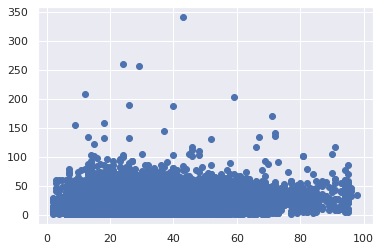

In [21]:
fig, axi = plt.subplots(1,1)
axi.scatter(x='TitleLength',y='NumberSkills',data=data)

Nope!

### Conclusion of Data Exploration
- There are many jobs with a seemingly unreasonable number of skill requirements.
- These long list of requirements often include synonyms such as "anlaytics", "analysis", "analyses". Collapsing these synonyms would allow for more robust analysis. Using basic stemming or lemmatization might help or off the shelf synonym tools could be explored, however the domain specific terminology might make necessitate other approaches.
- Long titled job descriptions do not seem to be inauthentic.
- Long job titles are not strongly correlated with long list of skills, implying that there isn't significant amount of "spamming" for clicks not that very specific jobs titles require very long lists of skills. Rather long job titles tend to include content that might best be put in a job description (eg location, salary, etc).

## Actual Analysis: Similar Jobs
I will try to look for "similar jobs" using two approaches. One is just distance of job titles (something like Levenstein distance). 

I will first try to eliminate the skills synonyms issue raised above by using stemming.

In [22]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
data = data.assign(StemmedSkills = data.Skills.apply(lambda z:
                                                     [" ".join([stemmer.stem(y) for y in x.split(" ")])
                                                                        for x in z]))
data = data.assign(StemmedSkills = data.StemmedSkills.apply(lambda x: list(set(x))))

In [34]:
data= data.assign(NumberStemmedSkills = data.StemmedSkills.apply(len))

In [35]:
data.head()

,JobID,Title,Skills,NumberSkills,TitleLength,StemmedSkills,NumberStemmedSkills
0,11542,system engineer,"[support, engineer, engineering, cots, agile, ...",16,15,"[integr, engin, support, document, develop, ag...",15
1,11543,application/desktop support associate,"[desktop support, support, sql server, sql, cu...",18,37,"[desktop support, document, support, sql serve...",18
2,11540,sap ssc consultant,"[sales, consultant, sap, requirement, net]",5,18,"[requir, consult, sap, net, sale]",5
3,11541,it finance and compliance analyst,"[support, procurement, analytical, lead, finan...",35,33,"[support, lead, report, audit, complianc, fina...",35
4,11546,"ios developer - ios development, mobile develo...","[computer, engineer, apps, computer science, a...",20,60,"[appl, engin, scienc, develop, rest, comput sc...",18


In [24]:
data.NumberStemmedSkills.describe()

count    50000.000000
mean        19.770360
std         12.726493
min          1.000000
25%         10.000000
50%         17.000000
75%         27.000000
max        326.000000
Name: NumberStemmedSkills, dtype: float64

In [25]:
data.NumberSkills.describe()

count    50000.000000
mean        20.491680
std         13.219016
min          1.000000
25%         11.000000
50%         18.000000
75%         28.000000
max        342.000000
Name: NumberSkills, dtype: float64

In [26]:
for _,x in data[data.NumberSkills != data.NumberStemmedSkills].sample(10, random_state = 5).iterrows():
    y = sorted(x['Skills'])
    z = sorted(x['StemmedSkills'])
    print("The job '" +x['Title']+"'  has skills \n" +','.join(y) + "\n"+ ','.join(z))

The job 'oracle order to cash sr. consultant'  has skills 
consultant,consulting,development,financial,identity,implementation,integration,metrics,oracle,oracle r12,process,r12,requirements,support
consult,develop,financi,ident,implement,integr,metric,oracl,oracl r12,process,r12,requir,support
The job 'software developer'  has skills 
administration,android,apps,c,communication,computer,computer science,design,developer,development,engineering,ga,html,http,integration,ios,iphone,java,javascript,linux,mobile,objective-c,perl,php,platform,quality assurance,reliability,requirements,research,rest,science,scripting,shell,shell scripting,software,software developer,software development,sql,support,testing,training,web,web services,windows
administr,android,app,c,commun,comput,comput scienc,design,develop,engin,ga,html,http,integr,io,iphon,java,javascript,linux,mobil,objective-c,perl,php,platform,qualiti assur,reliabl,requir,research,rest,scienc,script,shell,shell script,softwar,softwar devel

Didn't eliminate as much as I would have hoped... but this is the idea.

### Similar Jobs
I will try to find similar jobs by weighting stemmed skills inversely to their frequency and then performing a version of Jacard distance of jobs based on their stemmed skills.

In [49]:
# first, i will make jobid the index
data.set_index('JobID', inplace=True)

In [50]:
from collections import Counter
skills_list = list()
for x in data.StemmedSkills.tolist():
    skills_list += x

In [51]:
skills_hist = dict(Counter(skills_list))

In [52]:
skills_hist

{'integr': 9127,
 'engin': 13783,
 'support': 14839,
 'document': 6683,
 'develop': 31008,
 'agil': 4110,
 'eai': 259,
 'plan': 7782,
 'design': 22339,
 'system design': 596,
 'hardwar': 3733,
 'commun': 22356,
 'softwar': 14434,
 'cot': 189,
 'audit': 904,
 'desktop support': 440,
 'sql server': 5596,
 'sql': 14940,
 'manag': 18363,
 'consult': 10603,
 'custom servic': 1975,
 'applic support': 549,
 'window': 7183,
 'problem solv': 3486,
 '.net': 5094,
 'java': 9744,
 'financi': 4197,
 'net': 5006,
 'troubleshoot': 5820,
 'requir': 16944,
 'sap': 3450,
 'sale': 3111,
 'lead': 6364,
 'report': 6934,
 'complianc': 2219,
 'financ': 1618,
 'excel': 3983,
 'microsoft excel': 312,
 'procur': 592,
 'erp': 1647,
 'oracl': 9883,
 'analyt skill': 1982,
 'analysi': 8515,
 'microsoft': 5888,
 'iso': 610,
 'process': 8746,
 'sox': 406,
 'financi analysi': 114,
 'microsoft access': 152,
 'cio': 239,
 'analyst': 6381,
 'administr': 5296,
 'access': 4619,
 'ledger': 180,
 'account': 1469,
 'basic': 3

Now for each pair of jobids, I will take something similar to their jacard distance of their skills sets but where the elements are weighted by the inverse of their frequencies

In [53]:
JobIdDistances = pd.DataFrame(columns = ['JobId1', 'JobId2', 'd'])

In [55]:
data.head()

,Title,Skills,NumberSkills,TitleLength,StemmedSkills,NumberStemmedSkills
JobID,,,,,,
11542,system engineer,"[support, engineer, engineering, cots, agile, ...",16,15,"[integr, engin, support, document, develop, ag...",15
11543,application/desktop support associate,"[desktop support, support, sql server, sql, cu...",18,37,"[desktop support, document, support, sql serve...",18
11540,sap ssc consultant,"[sales, consultant, sap, requirement, net]",5,18,"[requir, consult, sap, net, sale]",5
11541,it finance and compliance analyst,"[support, procurement, analytical, lead, finan...",35,33,"[support, lead, report, audit, complianc, fina...",35
11546,"ios developer - ios development, mobile develo...","[computer, engineer, apps, computer science, a...",20,60,"[appl, engin, scienc, develop, rest, comput sc...",18


In [63]:
## This should all be vectorized.....
def InterValue(data, i, j):
    InterSkills = set(data.loc[i,"StemmedSkills"]).intersection(data.loc[j,"StemmedSkills"])
    if len(InterSkills) == 0:
        return 0
    else:
        return sum([1.0/skills_hist[x] for x in InterSkills])

def UnionValue(data, i, j):
    UnionSkills = set(data.loc[i,"StemmedSkills"]+data.loc[j,"StemmedSkills"])
    return sum([1.0/skills_hist[x] for x in UnionSkills])

def JacardDist(data, i, j):
    return 1 - InterValue(data, i, j)/UnionValue(data, i,j)

Let's see if it makes sense. Let's choose a few random jobs without being able to see their skills

In [70]:
data.loc[:,'Title'].sample(60,random_state = 1)

JobID
30372                              aws consultant - remote
46192                             software developer 3 job
44324                       web portal information manager
27927                                        ios developer
33873                       ecommerce scrum master (agile)
3626                                  sr. business analyst
3404                                 sap fico with testing
33031                              functional lead sap gts
35664    erp application analyst - order fulfillment an...
15174                 software engineer - c#, asp.net, mvc
10992                                 sap mm/pp consultant
47380    systems developer - node.js, redis, golang (a ...
25464                                     service engineer
38383                            web application developer
43813    java developer - java enterprise edition, api ...
49056                       infrastructure project manager
24038    senior application security engineer - st

I think the "ios developer" role should be very different from the "message broker consultant" so their distance should be close to 1:

In [73]:
JacardDist(data, '27927','47795')

0.9785969680712238

YAY!
I also think "ios developer" should be similar to "mobile software engineer" so their distance should be close to 0

In [72]:
JacardDist(data, '27927','42323')

0.973130677206836

that's not as good :/
let's try another hopefully close pair: programmer and developer

In [74]:
JacardDist(data, '22380','9748')

0.9503380675895868

well that's closer.... we should def play around with the metric some more.